/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_17_Shell_Avgs.dat
/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_10_Shell_Avgs.dat
/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_3_Shell_Avgs.dat
/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_22_Shell_Avgs.dat


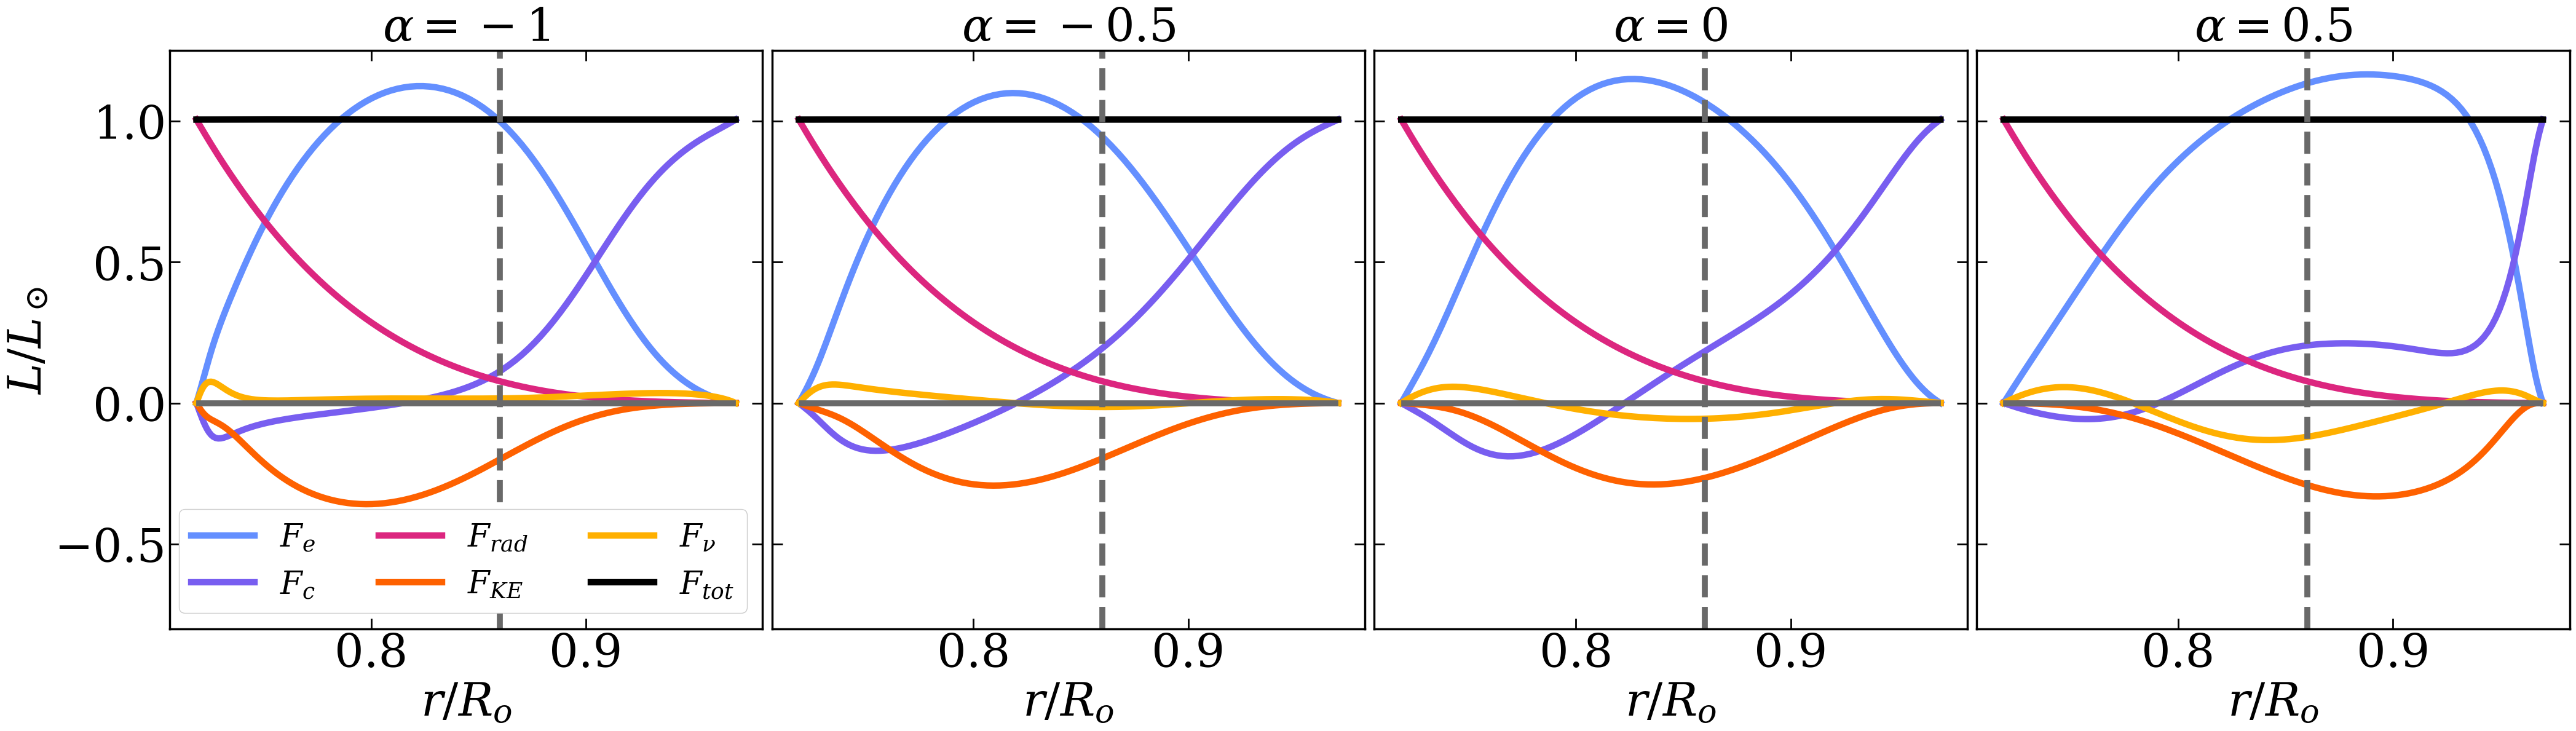

In [2]:
from rayleigh_diagnostics import G_Avgs, Shell_Slices
from New_Shell_Avgs import Shell_Avgs
from New_Shell_Spectra import Shell_Spectra
from reference_tools import equation_coefficients
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib as mpl
import spectral_utils

#Setup figure
fig, ax = plt.subplots(1, 4, sharey = True, sharex = True, figsize = (42, 12))
plt.setp(ax[0].spines.values(), linewidth=2.5)
plt.setp(ax[1].spines.values(), linewidth=2.5)
plt.setp(ax[2].spines.values(), linewidth=2.5)
plt.setp(ax[3].spines.values(), linewidth=2.5)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

file = ['17', '10', '3',  '22']
for col in range(4):

    #Read in file
    prefix = '/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_'
    suffix = '_Shell_Avgs.dat'
    infile = prefix + file[col] + suffix
    sa = Shell_Avgs(infile, path = '')

    
    #Read in the fluxes from shell averages file
    ienth = sa.lut[1455]
    icond = sa.lut[1470]
    irad = sa.lut[1433]
    ike = sa.lut[1923]
    ivisc = sa.lut[1935]

    enth = sa.vals[:,0,ienth,0]  
    cond = sa.vals[:,0,icond,0]
    rad = sa.vals[:,0,irad,0]
    ke = sa.vals[:,0,ike,0]
    visc = -sa.vals[:,0,ivisc,0]

    tot = enth+cond+rad+ke+visc  # The total

    #When we plot we will actually be plotting the luminosity
    radius = sa.radius
    pi = np.pi
    fpr = 4*pi*radius**2

    ax[col].plot(radius / (6.957e10) ,enth*fpr / 3.828e33, linewidth = 7.5 , color = '#648FFF', label = r'$F_e$')
    ax[col].plot(radius / (6.957e10) ,cond*fpr  / 3.828e33, linewidth = 7.5, color = '#785EF0', label = r'$F_c$')
    ax[col].plot(radius / (6.957e10) ,rad*fpr  / 3.828e33, linewidth = 7.5, color = '#DC267F', label = r'$F_{rad}$')
    ax[col].plot(radius / (6.957e10) ,ke*fpr  / 3.828e33, linewidth = 7.5, color = '#FE6100', label = r'$F_{KE}$')
    ax[col].plot(radius / (6.957e10) ,visc*fpr  / 3.828e33, linewidth = 7.5, color = '#FFB000', label = r'$F_\nu$')
    ax[col].plot(radius / (6.957e10) ,tot*fpr  / 3.828e33, linewidth = 7.5, color = 'black', label = r'$F_{tot}$')

    ax[col].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 54)
    ax[col].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 54)



ax[0].legend(ncol = 3, fontsize = 37, loc = 'lower right', framealpha = 1)
ax[0].set_ylabel(r'$L/L_\odot$', fontsize = 54)

ax[0].set_xlabel(r'$r / R_o$', fontsize = 54)
ax[1].set_xlabel(r'$r / R_o$', fontsize = 54)
ax[2].set_xlabel(r'$r / R_o$', fontsize = 54)
ax[3].set_xlabel(r'$r / R_o$', fontsize = 54)

ax[0].set_title(r'$\alpha = -1$', fontsize = 54)
ax[1].set_title(r'$\alpha = -0.5$', fontsize = 54)
ax[2].set_title(r'$\alpha = 0$', fontsize = 54)
ax[3].set_title(r'$\alpha = 0.5$', fontsize = 54)

ax[0].set_ylim(-0.8, 1.25)

ax[0].axhline(0, xmin = 0.05, xmax = 0.95, color = 'dimgrey', linewidth = 7)
ax[1].axhline(0, xmin = 0.05, xmax = 0.95, color = 'dimgrey', linewidth = 7)
ax[2].axhline(0, xmin = 0.05, xmax = 0.95, color = 'dimgrey', linewidth = 7)
ax[3].axhline(0, xmin = 0.05, xmax = 0.95, color = 'dimgrey', linewidth = 7)


ax[0].axvline(0.86, color = 'dimgrey', linewidth = 7, linestyle = '--')
ax[1].axvline(0.86, color = 'dimgrey', linewidth = 7, linestyle = '--')
ax[2].axvline(0.86, color = 'dimgrey', linewidth = 7, linestyle = '--')
ax[3].axvline(0.86, color = 'dimgrey', linewidth = 7, linestyle = '--')
#ax[1].set_ylim(-1.3, 1.7)
#ax[2].set_ylim(-1, 1.5)


plt.tight_layout()
plt.savefig('Flux_Balances_1e4.pdf', bbox_inches = 'tight', dpi = 300)

